## Task – 2 ( Heart Failure Prediction )

#### dataset link: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

##### There are some factors that affects Death Event. This dataset contains person's information like age ,sex , blood pressure, smoke, diabetes,ejection fraction, creatinine phosphokinase, serum_creatinine, serum_sodium, time and we have to predict their DEATH EVENT.

#### Overview of the data
Columns anaemia, diabetes, high_blood_pressure and smoking are boolean type

Rest of the columns except sex are numeric.

sex is a categorical column with only 2 values ( Male: 0 and Female: 1). Since there are only 2 categories, we need not do any hot encoding and we can leave them as they are.

DEATH_EVENT is our label column

In [74]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')


In [75]:
#reading the data
data=pd.read_csv('heart_record.csv',)

### EDA

In [76]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [77]:
data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [78]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [79]:
data.shape

(299, 13)

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [81]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [82]:
data.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


Text(0.5, 1.0, 'class distribution')

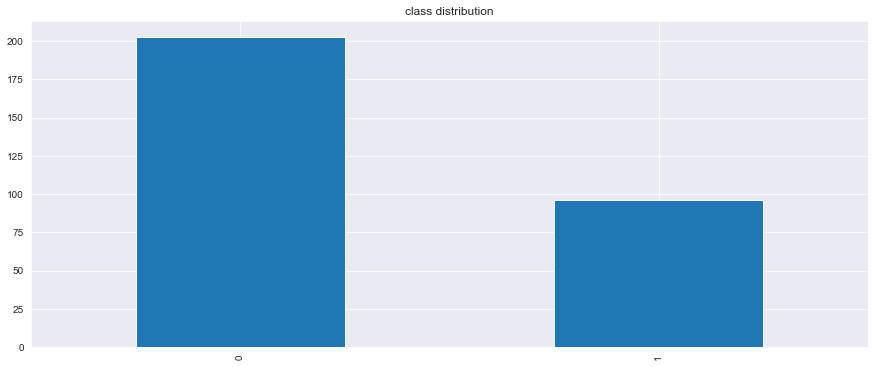

In [83]:
import matplotlib.pyplot as plt
data['DEATH_EVENT'].value_counts().plot(kind='bar')
plt.title('class distribution')


##### The class/label is moderately imbalanced, with 68% of the classes pointing to 0. 

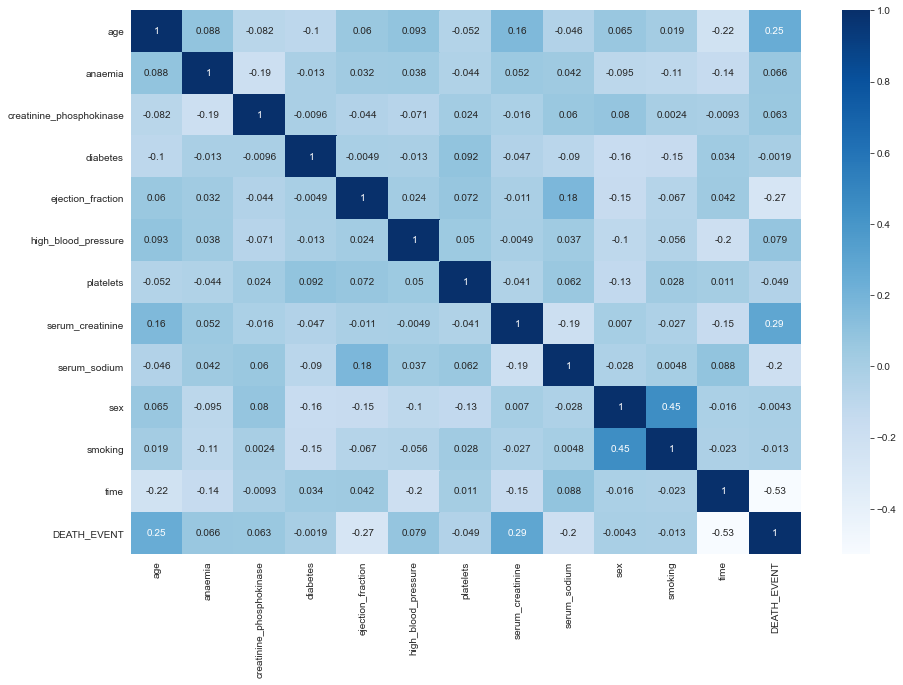

In [84]:
##check correlation
import seaborn as sns
correlation=data.corr()
plt.figure(figsize=(15,10))
colormap=plt.cm.Blues
g=sns.heatmap(data.corr(),annot=True,cmap=colormap)

In [85]:
data.corr()[abs(data.corr()['DEATH_EVENT']) > 0.1]['DEATH_EVENT']  

age                  0.253729
ejection_fraction   -0.268603
serum_creatinine     0.294278
serum_sodium        -0.195204
time                -0.526964
DEATH_EVENT          1.000000
Name: DEATH_EVENT, dtype: float64

##### The features 'age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', and 'time' have a considerable correlation with 'DEATH_EVENT'

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

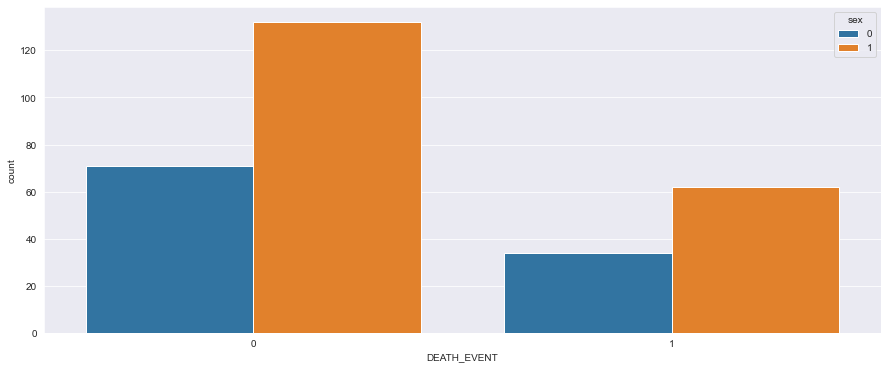

In [86]:
sns.countplot(x='DEATH_EVENT',hue='sex',data=data)

In [87]:
print(data['anaemia'].value_counts())

print(data['diabetes'].value_counts())

print(data['high_blood_pressure'].value_counts())

print(data['smoking'].value_counts())

0    170
1    129
Name: anaemia, dtype: int64
0    174
1    125
Name: diabetes, dtype: int64
0    194
1    105
Name: high_blood_pressure, dtype: int64
0    203
1     96
Name: smoking, dtype: int64


####  EDA (Categorical Data)

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

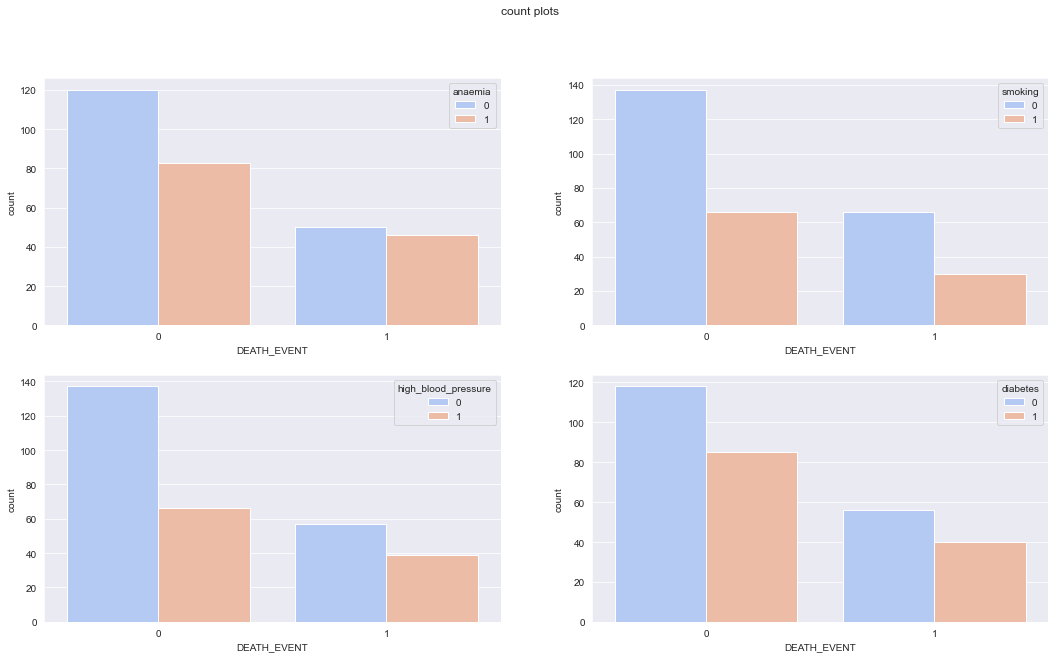

In [88]:

fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('count plots')

sns.countplot(ax=axes[0, 0],x='DEATH_EVENT',hue='anaemia',data=data,palette='coolwarm')
sns.countplot(ax=axes[0, 1],x='DEATH_EVENT',hue='smoking',data=data,palette='coolwarm')
sns.countplot(ax=axes[1, 0],x='DEATH_EVENT',hue='high_blood_pressure',data=data,palette='coolwarm')
sns.countplot(ax=axes[1, 1],x='DEATH_EVENT',hue='diabetes',data=data,palette='coolwarm')

In [89]:
data[data['platelets']>600000]['DEATH_EVENT']

105    1
109    0
296    0
Name: DEATH_EVENT, dtype: int64

##### EDA(Numerical Data)

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='serum_sodium'>

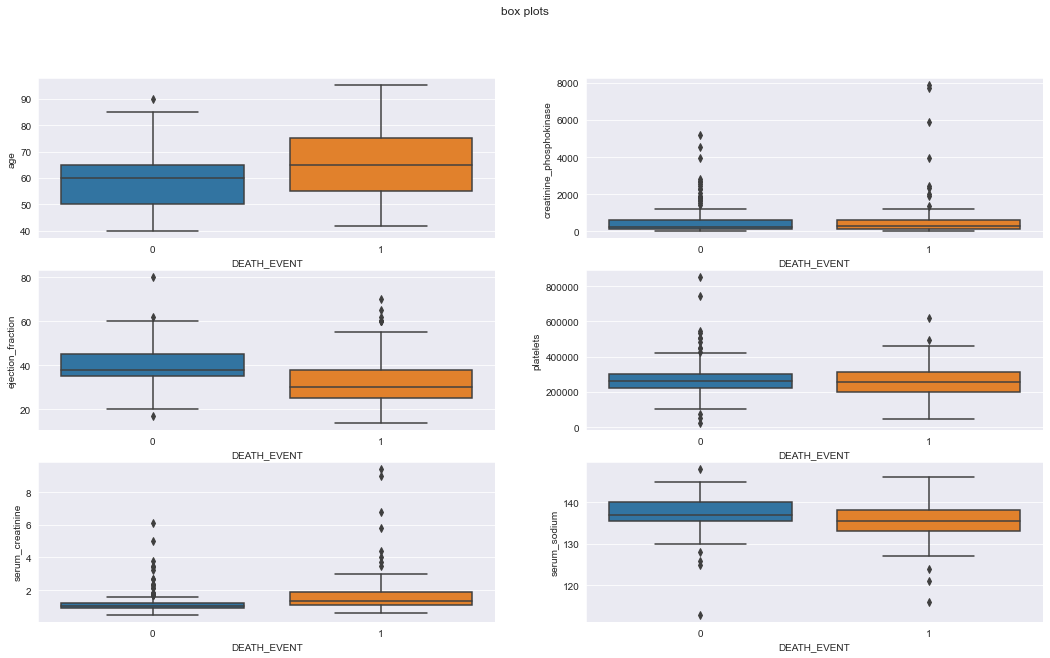

In [90]:
fig, axes = plt.subplots(3, 2, figsize=(18, 10))

fig.suptitle('box plots')

sns.boxplot(ax=axes[0, 0],x='DEATH_EVENT',y='age',data=data)
sns.boxplot(ax=axes[0, 1],x='DEATH_EVENT',y='creatinine_phosphokinase',data=data)
sns.boxplot(ax=axes[1, 0],x='DEATH_EVENT',y='ejection_fraction',data=data)
sns.boxplot(ax=axes[1, 1],x='DEATH_EVENT',y='platelets',data=data) # is this feature useful in predicting?
sns.boxplot(ax=axes[2, 0],x='DEATH_EVENT',y='serum_creatinine',data=data)
sns.boxplot(ax=axes[2, 1],x='DEATH_EVENT',y='serum_sodium',data=data)

##### When I researched a bit I found that all the values in serum_creatinine falls in possible range of values. So they are not outliers. They are actual data points that helps in predicting DEATH_EVENT.

In [91]:

def plot_hist(variable):
    print("min {} : {} ".format(variable, min(data[variable])))
    print("max {} : {}".format(variable, max(data[variable])))
    
    plt.figure(figsize=(9,3))
    plt.hist(data[variable], color="darkred")
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist ".format(variable))
    plt.show()

min age : 40.0 
max age : 95.0


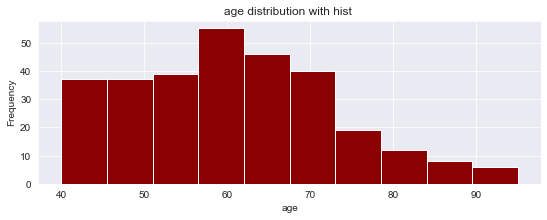

min creatinine_phosphokinase : 23 
max creatinine_phosphokinase : 7861


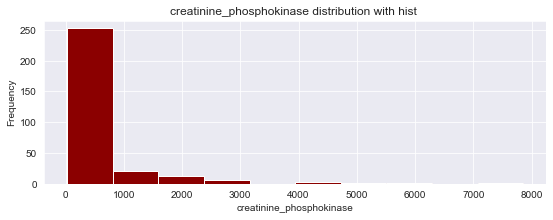

min ejection_fraction : 14 
max ejection_fraction : 80


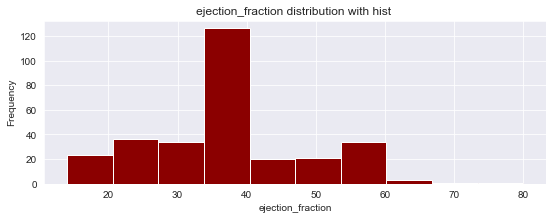

min platelets : 25100.0 
max platelets : 850000.0


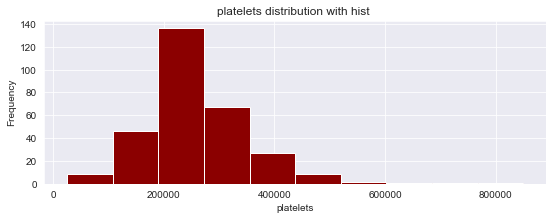

min serum_creatinine : 0.5 
max serum_creatinine : 9.4


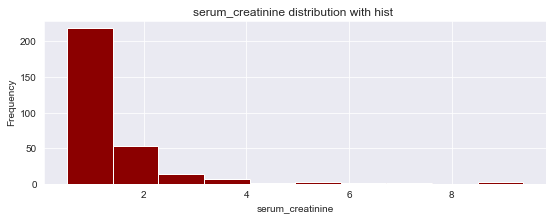

min serum_sodium : 113 
max serum_sodium : 148


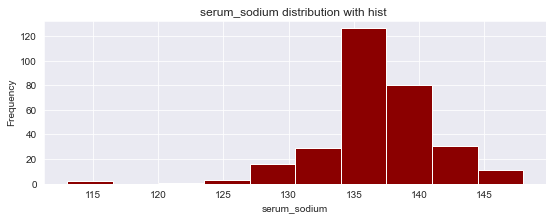

min time : 4 
max time : 285


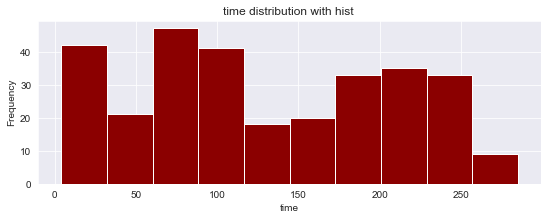

In [92]:
NumericVariable = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]
for n in NumericVariable:
    plot_hist(n)

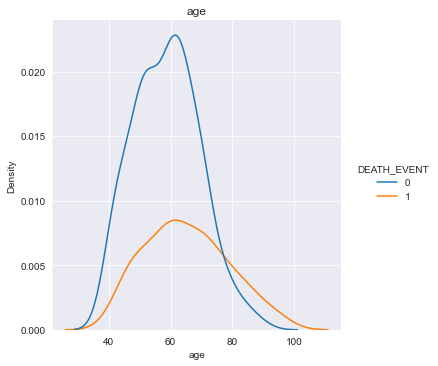

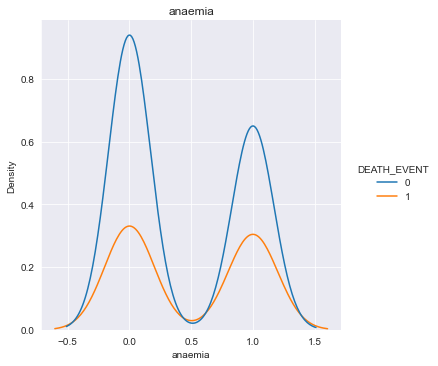

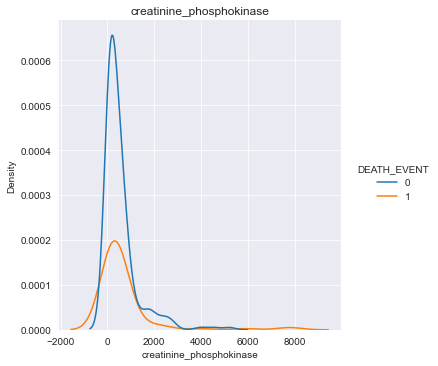

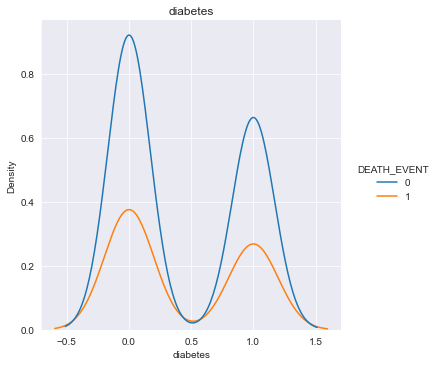

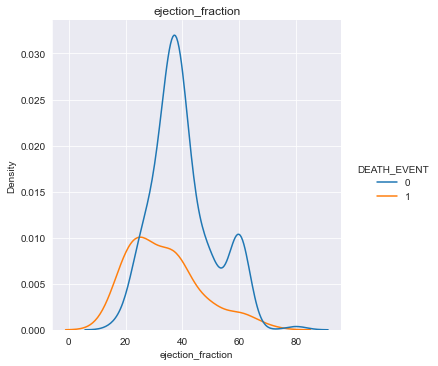

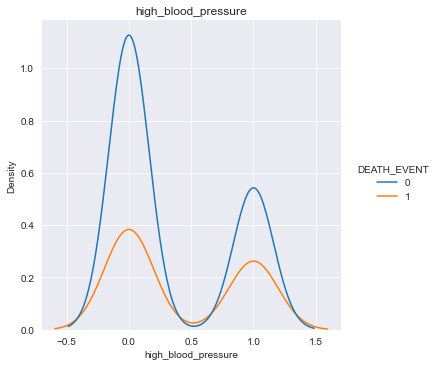

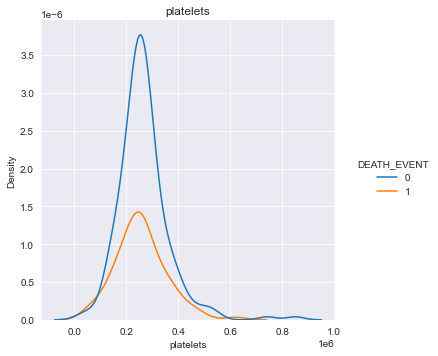

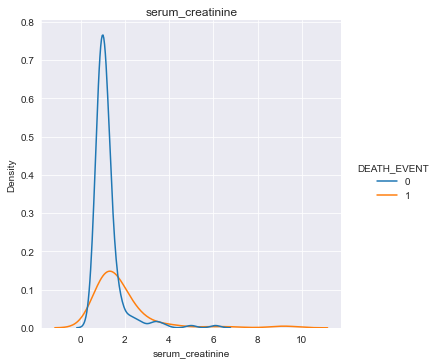

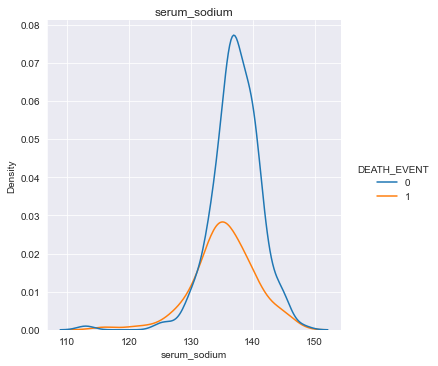

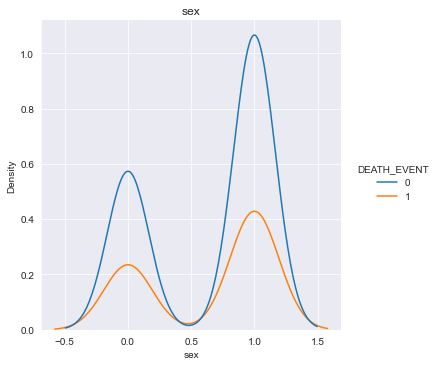

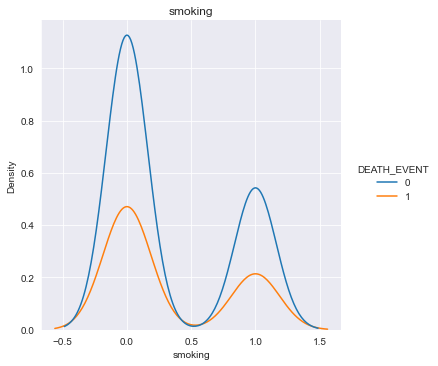

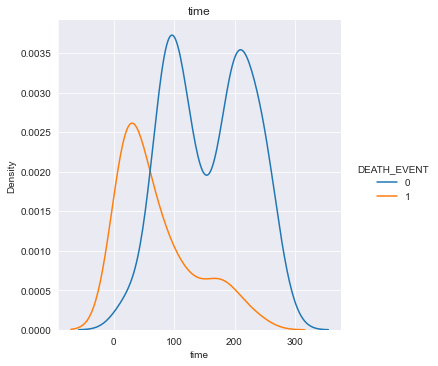

In [93]:
iterable=data.columns.tolist()
iterable.remove('DEATH_EVENT')
for items in iterable:
    sns.displot(data,x=items,kind='kde',hue='DEATH_EVENT')
    plt.title(items)

In [94]:
data.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

#### Feature Selection
Lets find out what features are relevant for predicting heart failure.

We can do this in two ways:

1.Plotting a correlation wrt death event and visualizing each feature wrt Death Event and see if there is any correlation

2.Using feature importance in ensemble techniques

##### Correlation only works in case of non-categorical data. So it needs additional effort for checking relation between categorical data and label.



In [95]:
#Separate the Categorical and Numerical variables
data_num = [name for name in data.columns if data[name].nunique() > 3]
data_cat = [name for name in data.columns if data[name].nunique() < 3]
data_num = data[data_num]

data_cat = data[data_cat]

<AxesSubplot:>

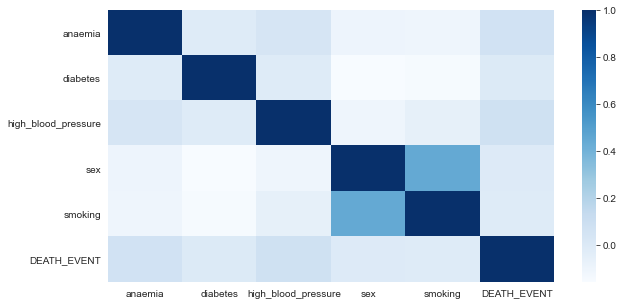

In [96]:
#Correlation between Categorical variables
plt.figure(figsize = (10,5))
sns.heatmap(data_cat.corr(), cmap="Blues")

##### Chi-square test is a statistical technique to test a relationship betwen two categorical variables. The chi-square tests below shows no categorical variable has a relationship with the target variable.

In [97]:
from scipy.stats import chi2_contingency 

In [98]:
for i in data_cat:
    ct = pd.crosstab(columns=data[i],index=data["DEATH_EVENT"])
    stat, p, dof, expected = chi2_contingency(ct) 
    print(f"\n{'-'*len(f'CROSSTAB BETWEEN {i.upper()} & DEATH_EVENT')}")
    print(f"CROSSTAB BETWEEN {i.upper()} & DEATH_EVENT")
    print(f"{'-'*len(f'CROSSTAB BETWEEN {i.upper()} & DEATH_EVENT')}")
    print(ct)
    print(f"\nH0: THERE IS NO RELATIONSHIP BETWEEN DEATH_EVENT & {i.upper()}\nH1: THERE IS RELATIONSHIP BETWEEN DEATH_EVENT & {i.upper()}")
    print(f"\nP-VALUE: {np.round(p,2)}")
    print("REJECT H0" if p<0.05 else "FAILED TO REJECT H0")


--------------------------------------
CROSSTAB BETWEEN ANAEMIA & DEATH_EVENT
--------------------------------------
anaemia        0   1
DEATH_EVENT         
0            120  83
1             50  46

H0: THERE IS NO RELATIONSHIP BETWEEN DEATH_EVENT & ANAEMIA
H1: THERE IS RELATIONSHIP BETWEEN DEATH_EVENT & ANAEMIA

P-VALUE: 0.31
FAILED TO REJECT H0

---------------------------------------
CROSSTAB BETWEEN DIABETES & DEATH_EVENT
---------------------------------------
diabetes       0   1
DEATH_EVENT         
0            118  85
1             56  40

H0: THERE IS NO RELATIONSHIP BETWEEN DEATH_EVENT & DIABETES
H1: THERE IS RELATIONSHIP BETWEEN DEATH_EVENT & DIABETES

P-VALUE: 0.93
FAILED TO REJECT H0

--------------------------------------------------
CROSSTAB BETWEEN HIGH_BLOOD_PRESSURE & DEATH_EVENT
--------------------------------------------------
high_blood_pressure    0   1
DEATH_EVENT                 
0                    137  66
1                     57  39

H0: THERE IS NO RE

'time' is the most influential variable.
##### 'serum_creatinine', 'ejection_fraction', 'age', 'creatinine_phosphokinase', 'platelets', 'serum_sodium' are looking important in the specified order. All these numerical features and as we saw from the chi-square tests earlier, the categorical features are not so important.

[0.09435406 0.02633699 0.07341064 0.03013077 0.13118271 0.02465981
 0.07218188 0.12231825 0.08759172 0.02844325 0.02738192 0.28200801]


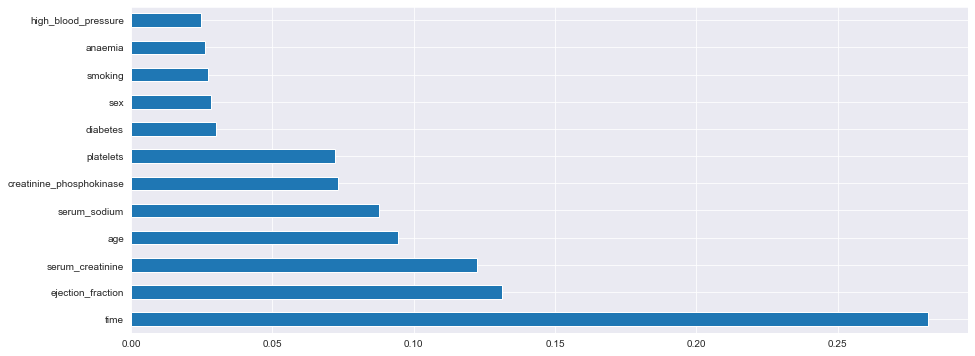

In [99]:
plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

a = data.iloc[:, :-1]
b = data.iloc[:,-1]

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(a,b)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=a.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [100]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [101]:
features = ['age','creatinine_phosphokinase',
       'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium', 'time']
label=["DEATH_EVENT"]

### Splitting of data

In [102]:
from sklearn.model_selection import train_test_split
X=data.drop(['DEATH_EVENT','anaemia','diabetes','high_blood_pressure','sex','smoking'],axis=1)
y=data['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Feature Scaling
##### Applying Standard scaler to the dataset

In [103]:

#Data Standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train['age'] = scaler.fit_transform(np.array(X_train['age']).reshape(-1,1))
X_test['age'] = scaler.transform(np.array(X_test['age']).reshape(-1,1))

X_train['creatinine_phosphokinase'] = scaler.fit_transform(np.array(X_train['creatinine_phosphokinase']).reshape(-1,1))
X_test['creatinine_phosphokinase'] = scaler.transform(np.array(X_test['creatinine_phosphokinase']).reshape(-1,1))

X_train['ejection_fraction'] = scaler.fit_transform(np.array(X_train['ejection_fraction']).reshape(-1,1))
X_test['ejection_fraction'] = scaler.transform(np.array(X_test['ejection_fraction']).reshape(-1,1))

X_train['platelets'] = scaler.fit_transform(np.array(X_train['platelets']).reshape(-1,1))
X_test['platelets'] = scaler.transform(np.array(X_test['platelets']).reshape(-1,1))


X_train['serum_creatinine'] = scaler.fit_transform(np.array(X_train['serum_creatinine']).reshape(-1,1))
X_test['serum_creatinine'] = scaler.transform(np.array(X_test['serum_creatinine']).reshape(-1,1))

X_train['serum_sodium'] = scaler.fit_transform(np.array(X_train['serum_sodium']).reshape(-1,1))
X_test['serum_sodium'] = scaler.transform(np.array(X_test['serum_sodium']).reshape(-1,1))

X_train['time'] = scaler.fit_transform(np.array(X_train['time']).reshape(-1,1))
X_test['time'] = scaler.transform(np.array(X_test['time']).reshape(-1,1))


In [104]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score,recall_score


### Random Forest Classifier
The Random Forest is an ensemble method specifically designed for Decision Tree classifiers. As an ensemble method, it generates several different weak learners and then it combines them in order to achieve an higher accuracy.

##### To evaluate each model the metrics I will use are the following: Accuracy, Precision, Recall and Confusion matrix

Predicting an healthy patient in risk would result in furthur useless costs, but predicting a patient at risk  as healthy could result in serious consequences.So, here more importance will be given at detecting as many deseased patients as possible 
##### ( higher recall value) at the lower classification accuracy( lower precision score).

In [105]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(criterion='gini',max_depth=4,random_state=4)
random_forest_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, random_state=4)

In [106]:
#X_test.head(1)

In [107]:
#random_forest_model.predict([[-0.91592,-0.472026,-1.504834,-0.730964,-0.580849,0.514656,0.215153]])[0]

In [108]:
#scaler.transform(np.array(float(10)).reshape(-1,1))[0][0]

In [109]:
y_pred = random_forest_model.predict(X_test)


In [113]:
accuracy=accuracy_score(y_test,y_pred)
recall=recall_score(y_test, y_pred)
precision=precision_score(y_test,y_pred)
print( "Accuracy of Random Forest Classifier is : ", "{:.2f}%".format(100* accuracy))

print("Recall of Random Forest Classifier is : ", "{:.2f}%".format(100*recall))
print("Precision of Random Forest Classifier is : ", "{:.2f}%".format(100*precision))


Accuracy of Random Forest Classifier is :  90.00%
Recall of Random Forest Classifier is :  71.43%
Precision of Random Forest Classifier is :  83.33%


#### Random Forest Classifier is giving the accuracy of 90%

<AxesSubplot:>

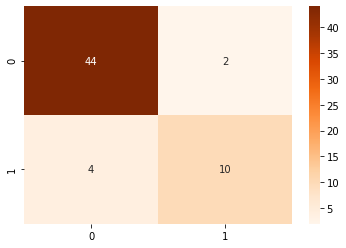

In [61]:
 #building heatmap
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, cmap='Oranges',annot = True)

### Randomized SearchCV

In [38]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [39]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   47.3s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.8min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=100, verbose=2)

In [40]:
rf_randomcv.best_params_

{'n_estimators': 400,
 'min_samples_split': 14,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 670,
 'criterion': 'gini'}

In [62]:
best_random_grid=rf_randomcv.best_estimator_

In [63]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
accuracy1=accuracy_score(y_test,y_pred)
print( "Accuracy of Random Search CV is : ", "{:.2f}%".format(100* accuracy1))


[[43  3]
 [ 3 11]]
Accuracy of Random Search CV is :  90.00%


### Grid SearchCV

In [64]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+2, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] - 100, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 200]
}

print(param_grid)


{'criterion': ['gini'], 'max_depth': [670], 'max_features': ['sqrt'], 'min_samples_leaf': [2, 4, 6], 'min_samples_split': [12, 13, 14, 15, 16], 'n_estimators': [200, 300, 400, 500, 600]}


In [65]:
#### Fit the grid_search to the data
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 75 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  1.5min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [670],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [12, 13, 14, 15, 16],
                         'n_estimators': [200, 300, 400, 500, 600]},
             verbose=2)

In [66]:
grid_search.best_estimator_


RandomForestClassifier(max_depth=670, max_features='sqrt', min_samples_leaf=6,
                       min_samples_split=12, n_estimators=200)

In [67]:
best_grid=grid_search.best_estimator_
best_grid

RandomForestClassifier(max_depth=670, max_features='sqrt', min_samples_leaf=6,
                       min_samples_split=12, n_estimators=200)

In [68]:
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print( "Accuracy of Grid Search CV is : ", "{:.2f}%".format(100* accuracy))


[[44  2]
 [ 4 10]]
Accuracy of Grid Search CV is :  90.00%


### pickle file

In [114]:
import pickle

In [115]:
file=open('random_forest_model.pkl','wb')
pickle.dump(random_forest_model,file)
pickle.dump(scaler,open('scaler.pkl','wb'))

file.close()